# Loading libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Dataset info

In [2]:
# Load the dataset
df=pd.read_csv('/kaggle/input/data-on-covid19-coronavirus/owid-covid-data.csv')

In [3]:
# Explore the basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327302 entries, 0 to 327301
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    327302 non-null  object 
 1   continent                                   311734 non-null  object 
 2   location                                    327302 non-null  object 
 3   date                                        327302 non-null  object 
 4   total_cases                                 289884 non-null  float64
 5   new_cases                                   318216 non-null  float64
 6   new_cases_smoothed                          316953 non-null  float64
 7   total_deaths                                268842 non-null  float64
 8   new_deaths                                  318271 non-null  float64
 9   new_deaths_smoothed                         317041 non-null  float64
 

In [4]:
# Check the first few rows of the dataset
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [5]:
# Summary statistics
df.describe()


,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,2.898840e+05,3.182160e+05,3.169530e+05,2.688420e+05,318271.000000,317041.000000,289884.000000,318216.000000,316953.000000,268842.000000,...,187709.000000,124246.000000,223942.000000,301009.000000,245881.000000,3.273020e+05,1.140900e+04,11409.000000,11409.000000,11409.000000
mean,6.170323e+06,1.025784e+04,1.029132e+04,8.309868e+04,92.860072,93.213361,94045.724004,154.597287,155.188391,838.052390,...,32.910486,50.791072,3.097256,73.716402,0.722478,1.283964e+08,4.932573e+04,9.631071,11.950736,1576.279708
std,3.811065e+07,1.141598e+05,9.775639e+04,4.272334e+05,765.933703,600.737767,144282.192372,1201.930152,619.178058,1075.902225,...,13.573707,31.955932,2.548280,7.395911,0.148978,6.606319e+08,1.417908e+05,12.536786,25.710117,1890.398724
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2142.340300
25%,7.344000e+03,0.000000e+00,7.140000e-01,1.250000e+02,0.000000,0.000000,2239.586250,0.000000,0.137000,55.444000,...,22.600000,20.859000,1.300000,69.590000,0.602000,4.490020e+05,6.600000e+01,1.010000,-1.440000,44.086660
50%,6.415300e+04,4.000000e+00,3.128600e+01,1.232000e+03,0.000000,0.143000,23877.357000,0.423500,8.653000,354.303500,...,33.100000,49.839000,2.500000,75.050000,0.740000,5.882259e+06,5.291501e+03,7.930000,6.080000,1004.616640
75%,6.757358e+05,3.260000e+02,5.762860e+02,1.111100e+04,3.000000,6.000000,119654.074000,43.036000,94.157000,1284.585000,...,41.300000,83.241000,4.200000,79.460000,0.829000,2.830170e+07,3.481000e+04,15.400000,17.130000,2581.560300
max,7.682370e+08,8.401763e+06,6.402720e+06,6.951664e+06,121590.000000,18213.857000,737554.506000,228872.025000,37241.781000,6496.496000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.281224e+06,76.550000,377.430000,10292.468000


# Data Cleaning

In [6]:
# Check for missing values
df.isnull().sum()

iso_code                                        0
continent                                   15568
location                                        0
date                                            0
total_cases                                 37418
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       315893
excess_mortality_cumulative                315893
excess_mortality                           315893
excess_mortality_cumulative_per_million    315893
Length: 67, dtype: int64

In [7]:

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Handling missing values

# Filling missing values in 'location' 'continent' column
df['location'].fillna('Unknown', inplace=True)
df['continent'].fillna('Unknown', inplace=True)

# Filling missing values in numeric columns with appropriate strategies
# For example, fill missing values in 'total_cases', 'new_cases', etc. with 0
df['total_cases'].fillna(0, inplace=True)
df['new_cases'].fillna(0, inplace=True)


# Final check for missing values after data cleaning and preprocessing
print(df.isnull().sum())

iso_code                                        0
continent                                       0
location                                        0
date                                            0
total_cases                                     0
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       315893
excess_mortality_cumulative                315893
excess_mortality                           315893
excess_mortality_cumulative_per_million    315893
Length: 67, dtype: int64


# Analysis

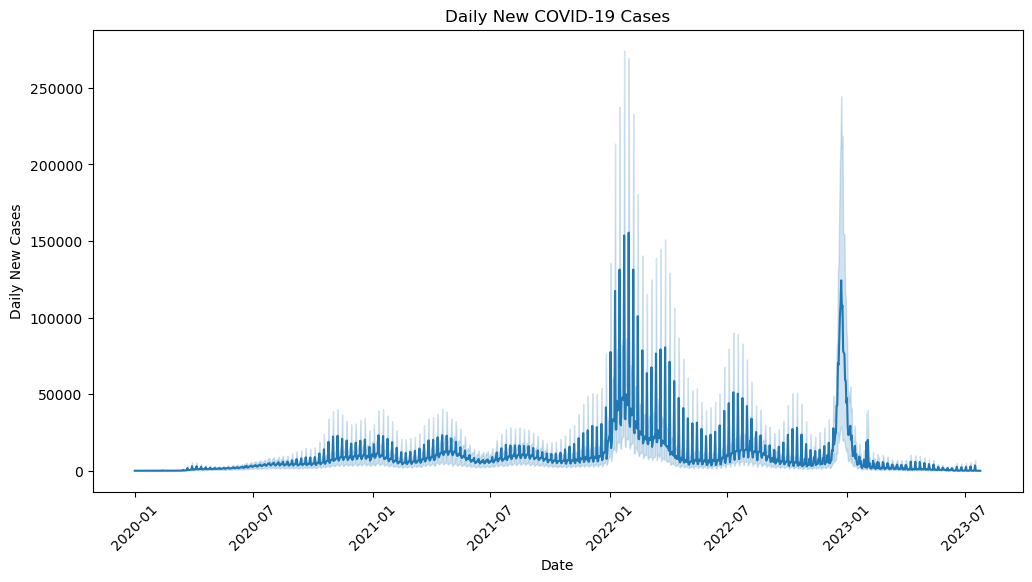

In [8]:
# Visualization 1: Line plot of daily new cases
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='new_cases', data=df)
plt.xlabel('Date')
plt.ylabel('Daily New Cases')
plt.title('Daily New COVID-19 Cases')
plt.xticks(rotation=45)
plt.show()

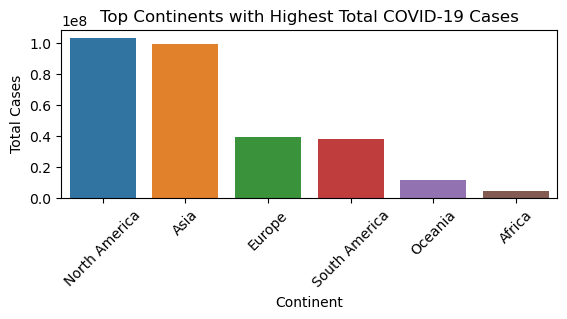

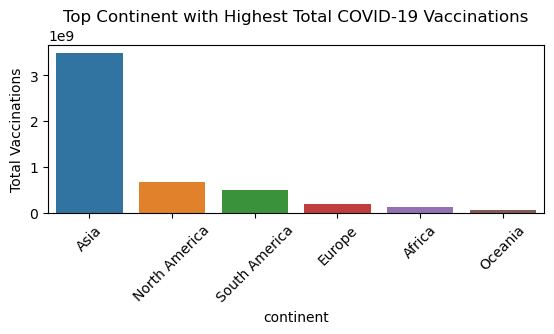

In [9]:
# Visualization 2: Bar plot of total cases by country

total_cases_by_country = df.groupby('continent')['total_cases'].max().sort_values(ascending=False).tail(6)
#plt.figure(figsize=(12, 6))
plt.subplot(2,1,1)
sns.barplot(x=total_cases_by_country.index, y=total_cases_by_country.values)
plt.xlabel('Continent')
plt.ylabel('Total Cases')
plt.title('Top Continents with Highest Total COVID-19 Cases')
plt.xticks(rotation=45)
plt.show()
plt.subplot(2,1,2)
# Visualization 4: Bar plot of total vaccinations by country
total_vaccinations_by_country = df.groupby('continent')['total_vaccinations'].max().sort_values(ascending=False).tail(6)
#plt.figure(figsize=(12, 6))
sns.barplot(x=total_vaccinations_by_country.index, y=total_vaccinations_by_country.values)
plt.xlabel('continent')
plt.ylabel('Total Vaccinations')
plt.title('Top Continent with Highest Total COVID-19 Vaccinations')
plt.xticks(rotation=45)
plt.show()

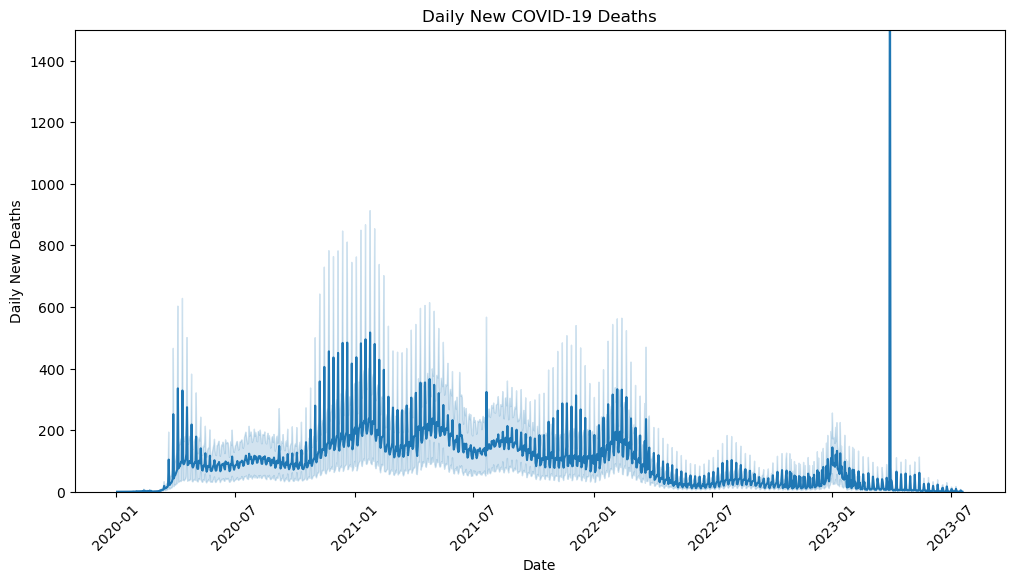

In [10]:
# Visualization 3: Line plot of daily new deaths
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='new_deaths', data=df)
plt.xlabel('Date')
plt.ylabel('Daily New Deaths')
plt.title('Daily New COVID-19 Deaths')
plt.xticks(rotation=45)
plt.ylim([0, 1500])
plt.show()

In [12]:
df = df[df['continent'] != 'Unknown']

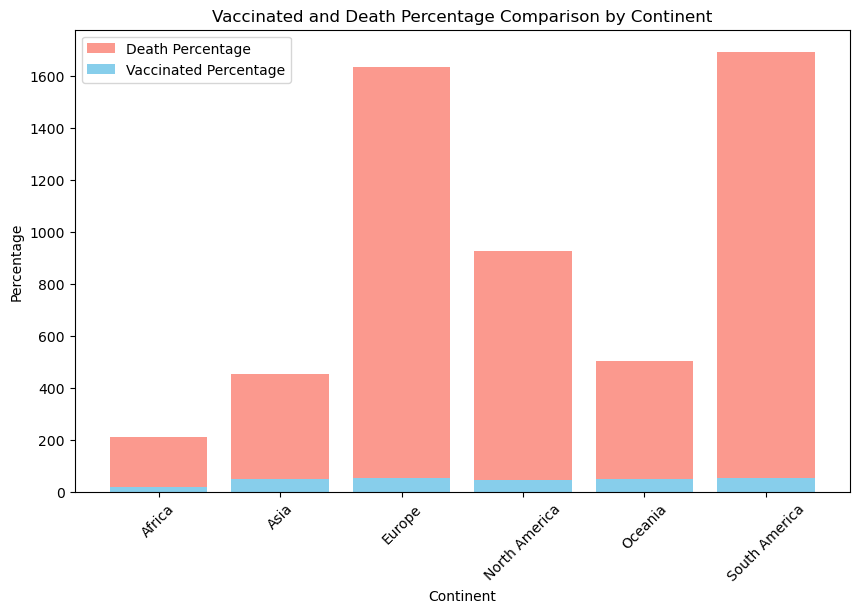

In [28]:
# Calculate the percentage of fully vaccinated people per continent
df_continent_vaccination = df.groupby('continent')['people_fully_vaccinated_per_hundred'].mean().reset_index()

# Calculate the percentage of deaths per confirmed cases per continent
df_continent_death_percentage = df.groupby('continent')['total_deaths_per_million'].mean().reset_index()

# Merge the two dataframes
df_continent_comparison = pd.merge(df_continent_vaccination, df_continent_death_percentage, on='continent')

# Plot the comparison
plt.figure(figsize=(10, 6))
plt.bar(df_continent_comparison['continent'], df_continent_comparison['total_deaths_per_million'], label='Death Percentage', color='salmon', alpha=0.8)
plt.bar(df_continent_comparison['continent'], df_continent_comparison['people_fully_vaccinated_per_hundred'], label='Vaccinated Percentage', color='skyblue')
plt.xlabel('Continent')
plt.ylabel('Percentage')
plt.title('Vaccinated and Death Percentage Comparison by Continent')
plt.legend()
plt.xticks(rotation=45)
plt.show()


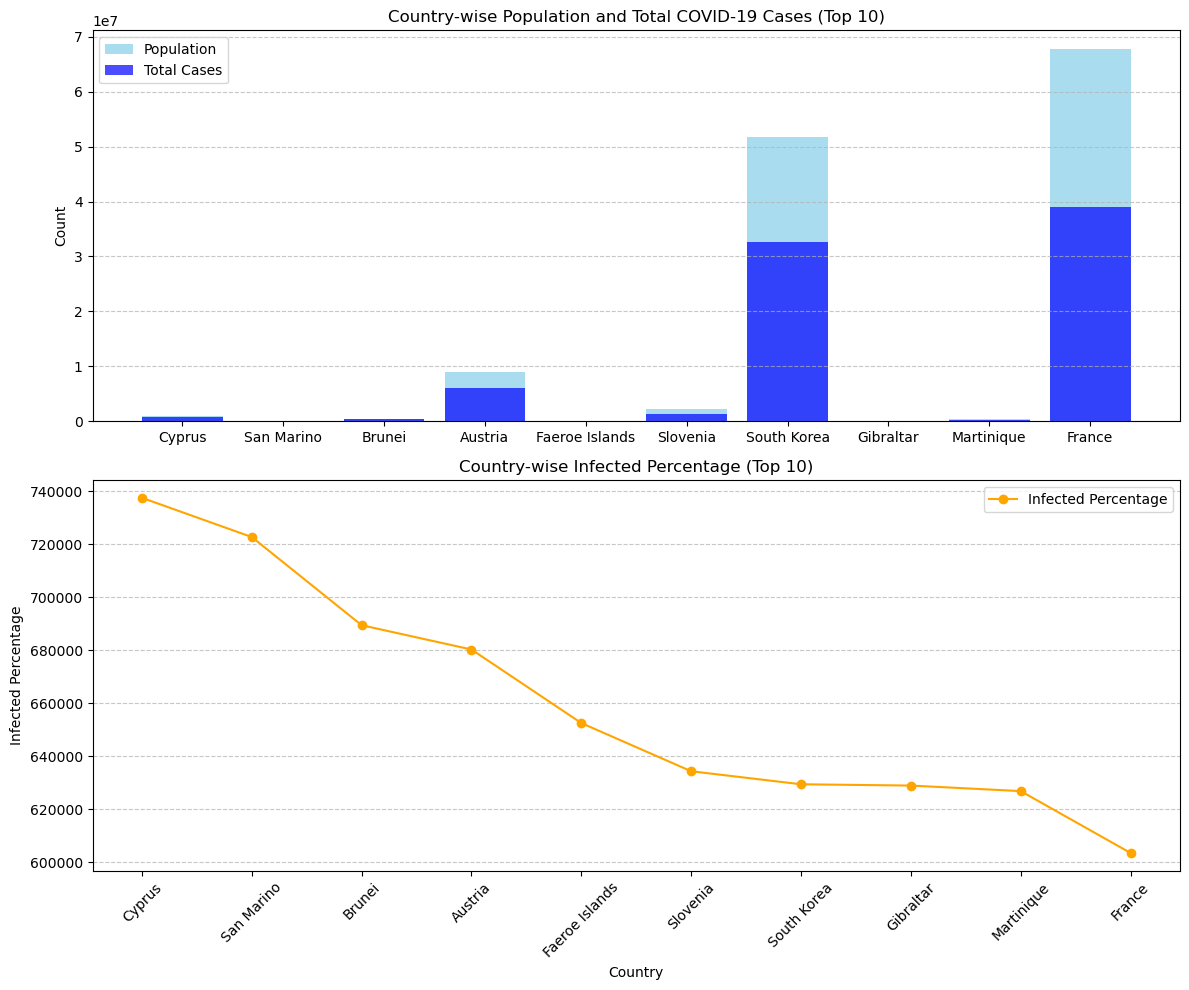

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded the data into a DataFrame named 'df'

# Group the data by country and calculate the total population, total COVID-19 cases, and infected percentage
df_country_stats = df.groupby('location').agg(
    total_population=('population', 'max'),
    total_cases=('total_cases', 'max'),
    infected_percentage=('total_cases_per_million', 'max')
).reset_index()

# Sort the data by infected percentage in descending order
df_country_stats = df_country_stats.sort_values(by='infected_percentage', ascending=False)

# Create subplots to compare population, total cases, and infected percentage
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Plot 1: Country-wise Population and Total COVID-19 Cases
axes[0].bar(df_country_stats['location'][:10], df_country_stats['total_population'][:10], label='Population', color='skyblue', alpha=0.7)
axes[0].bar(df_country_stats['location'][:10], df_country_stats['total_cases'][:10], label='Total Cases', color='blue', alpha=0.7)
axes[0].set_ylabel('Count')
axes[0].set_title('Country-wise Population and Total COVID-19 Cases (Top 10)')
axes[0].legend()
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot 2: Country-wise Infected Percentage
axes[1].plot(df_country_stats['location'][:10], df_country_stats['infected_percentage'][:10], label='Infected Percentage', marker='o', color='orange')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Infected Percentage')
axes[1].set_title('Country-wise Infected Percentage (Top 10)')
axes[1].legend()
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
